# Decision  Tree Classifier

<span>A decision tree classier is a very simple tree-like model. The classifier will build a decision tree and split the classes by layer heuristics and the consequences of each path in the decision tree. The methodology is both used in operations and machine learning research. Using the sklearn the model can be trained with various parameter adjustments such a tree depth and minimum number of samples in each layer.</span>

### Import Preliminaries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import collections
import graphviz
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 
import pydotplus
import warnings

from IPython.display import Image  
from sklearn.datasets import load_breast_cancer
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (9.0, 3.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [2]:
# Import Breast Cancer data
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Conduct a train-test split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y)

# View the training dataframe
pd.DataFrame(train_x, columns=breast_cancer['feature_names']).head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,11.130,16.620,70.470,381.100,0.082,0.038,0.014,0.014,0.151,0.061,0.141,0.967,0.968,9.704,0.006,0.006,0.009,0.006,0.020,0.002,11.680,20.290,74.350,421.100,0.103,0.062,0.046,0.040,0.238,0.071
1,12.830,15.730,82.890,506.900,0.090,0.083,0.058,0.031,0.171,0.059,0.150,0.487,1.195,11.640,0.005,0.018,0.033,0.008,0.016,0.002,14.090,19.350,93.220,605.800,0.133,0.261,0.348,0.098,0.301,0.078
2,19.800,21.560,129.700,1230.000,0.094,0.131,0.127,0.087,0.209,0.056,0.955,1.186,6.487,124.400,0.007,0.032,0.034,0.017,0.019,0.004,25.730,28.640,170.300,2009.000,0.135,0.324,0.362,0.182,0.307,0.083
3,11.760,18.140,75.000,431.100,0.100,0.059,0.027,0.035,0.162,0.063,0.645,2.105,4.138,49.110,0.006,0.010,0.013,0.014,0.016,0.003,13.360,23.390,85.100,553.600,0.114,0.080,0.061,0.072,0.198,0.069
4,9.904,18.060,64.600,302.400,0.097,0.129,0.131,0.037,0.167,0.081,0.431,2.261,3.132,27.480,0.013,0.088,0.120,0.025,0.039,0.018,11.260,24.390,73.070,390.200,0.130,0.295,0.349,0.099,0.261,0.116


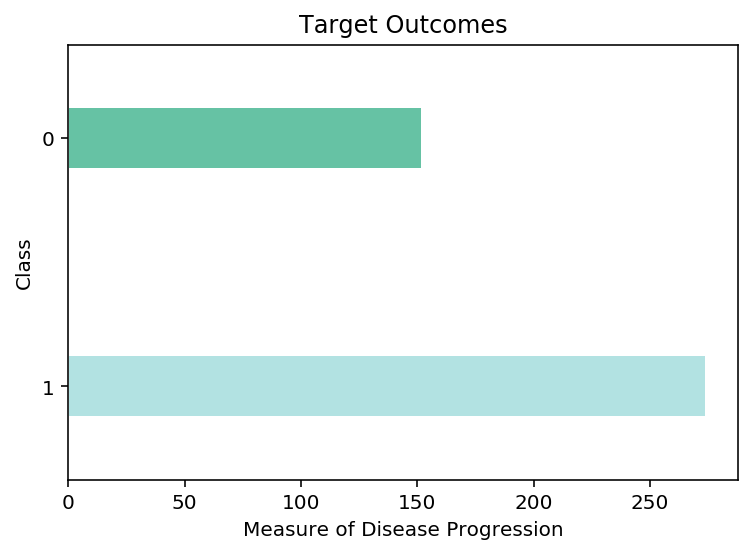

In [3]:
# Plot a barplot of the target clasees
pd.Series(train_y).value_counts().plot.barh(grid=False, color=['#B2E2E2','#66C2A4'], width=0.25,edgecolor='w')
plt.title('Target Outcomes')
plt.ylabel('Class')
plt.xlabel('Measure of Disease Progression');

### Fit the Model

In [4]:
# Fit the intial model
dt_model = DecisionTreeClassifier()
dt_model.fit(train_x, train_y);

### Model Evaluation

##### Cross Validation Score

In [5]:
# View the cross validation score of the intial model
scores = cross_val_score(dt_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.92252


#### Confustion Matrix

In [6]:
# Training Confusion Matrix
from sklearn.metrics import confusion_matrix
cmatrix = pd.DataFrame(confusion_matrix(train_y, dt_model.predict(train_x)))
cmatrix.index.name = 'class'

cmatrix['result'] = 'actual'
cmatrix.set_index('result', append=True, inplace=True)
cmatrix = cmatrix.reorder_levels(['result', 'class'])
cmatrix = cmatrix.stack()
cmatrix = pd.DataFrame(cmatrix)
cmatrix.columns = ['prediction']
cmatrix.unstack()

prediction     
                      0    1
result class                
actual 0            152    0
       1              0  274

##### Tree Diagram

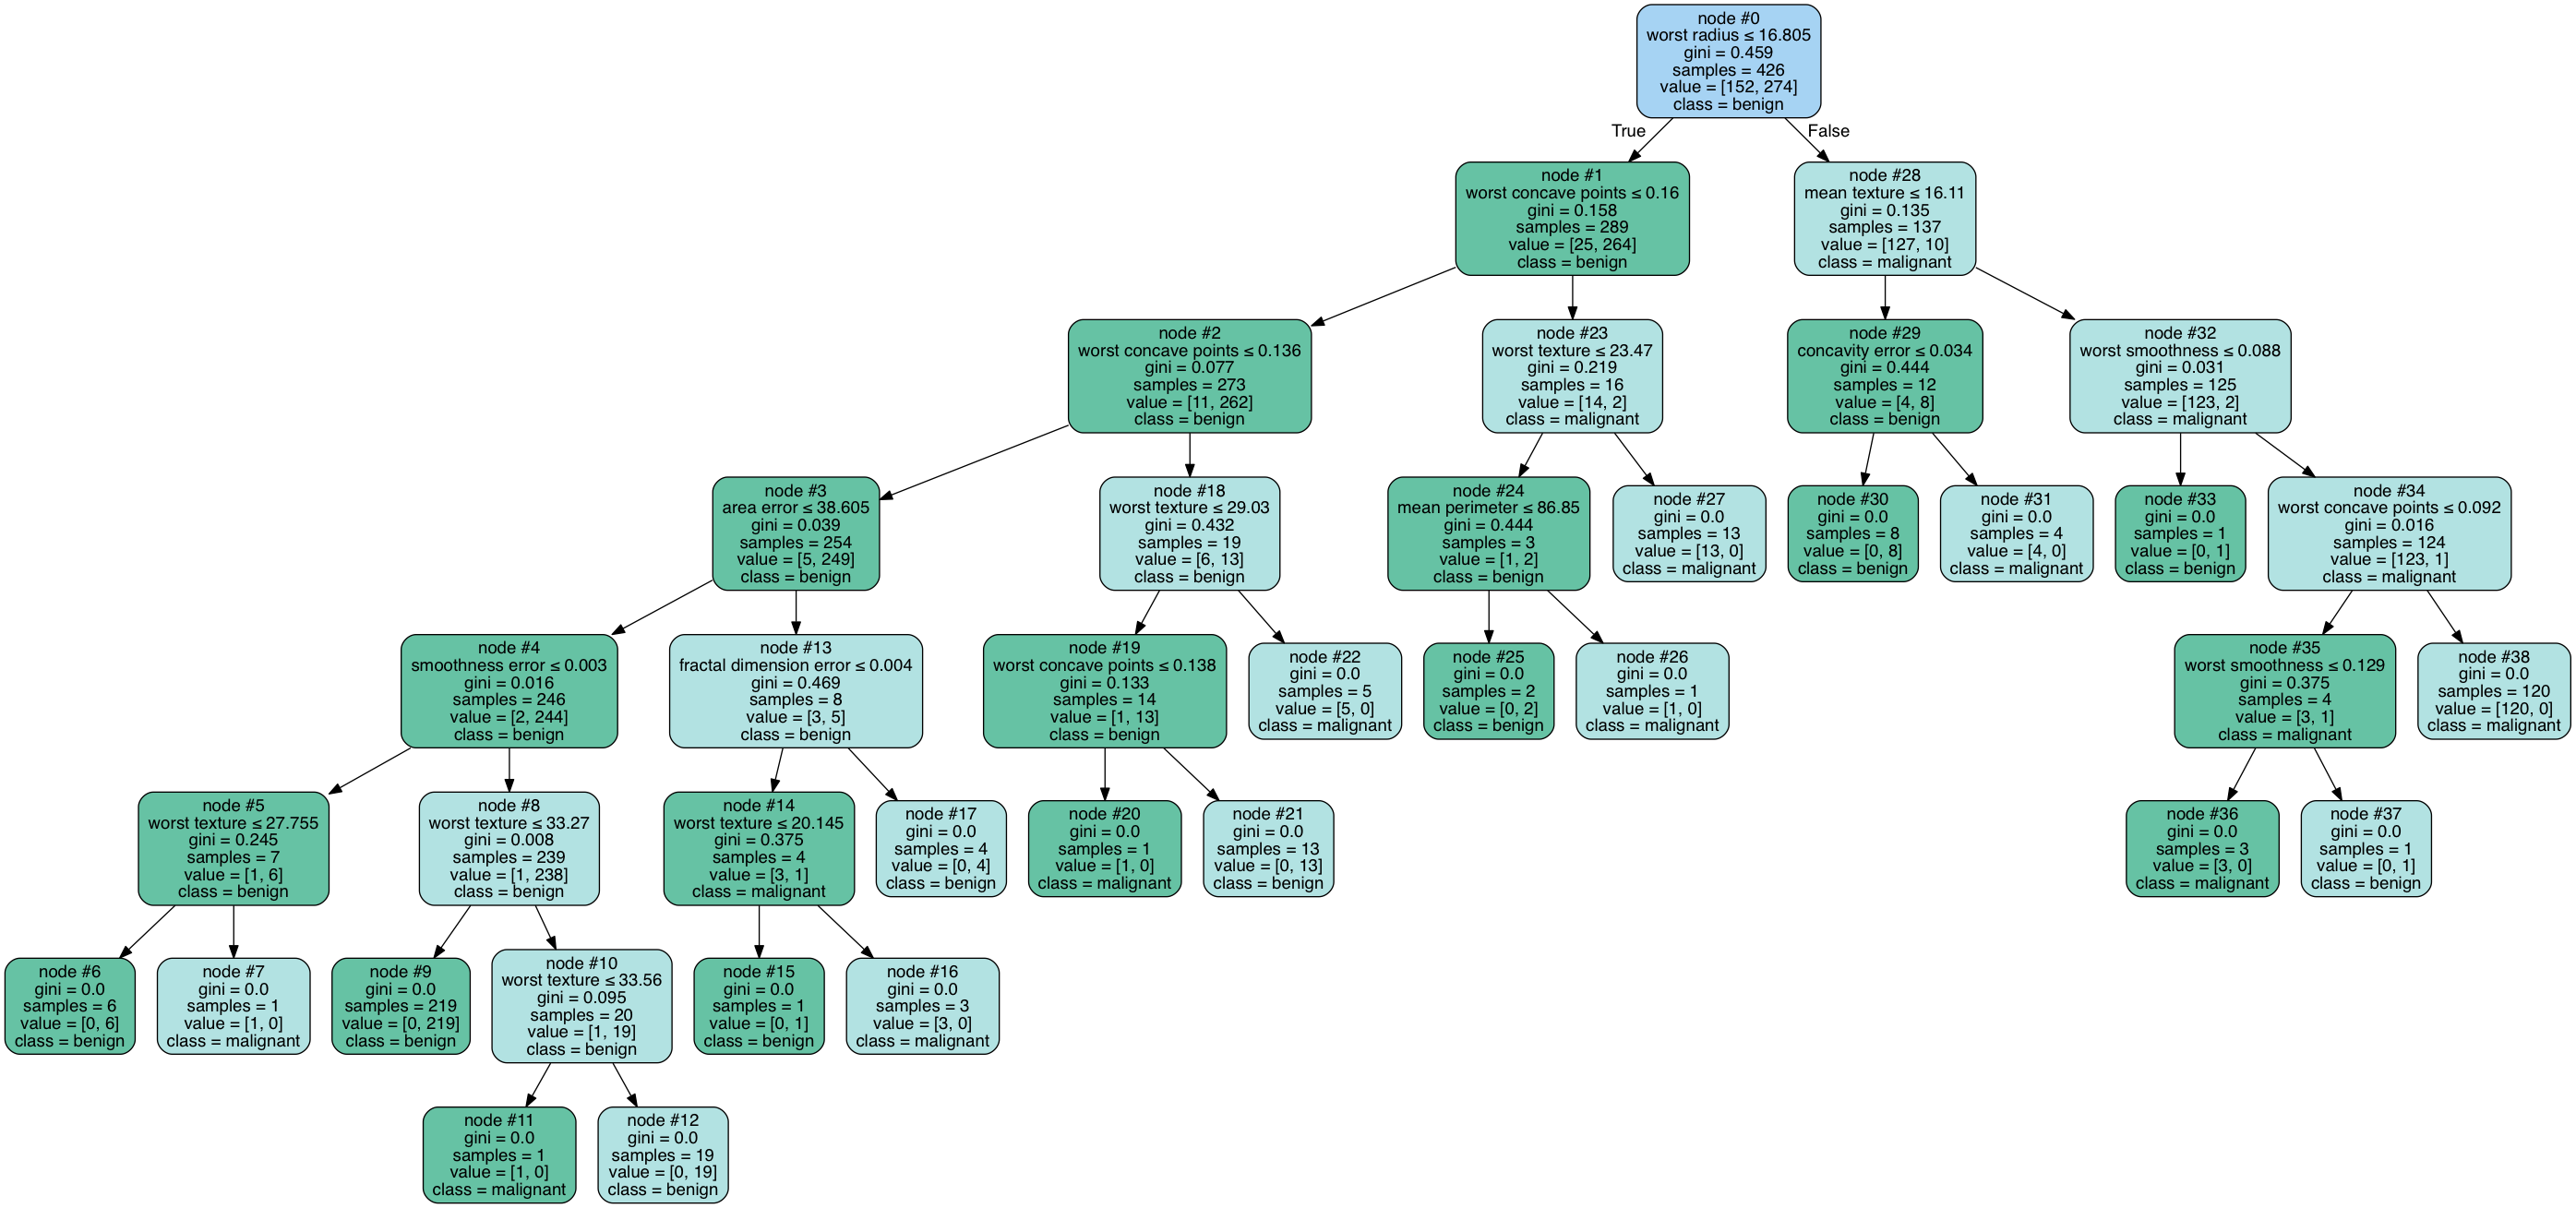

In [7]:
dot_data = StringIO()

# Export graph from sklearn
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = breast_cancer['feature_names'],
               class_names = breast_cancer['target_names'],
               node_ids = True, proportion= False)

# Generate graphusing pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 


# Color Decision Tree
colors = ('#66C2A4', '#B2E2E2')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

# Save Image
graph.write_png('Images/dt_model.png')

# View Decision Tree Plot
Image(graph.create_png())

#### Coloring Decision Tree

This is great but the blue and orange is very ugly. Lets see if we can make it a bit more apealling. Note the following code is borrowerd from the source below. Please check it our and offer a big thank you to the developer. 

Link: https://stackoverflow.com/questions/42891148/changing-colors-for-decision-tree-plot-created-using-export-graphviz

##### Parameter Tuning

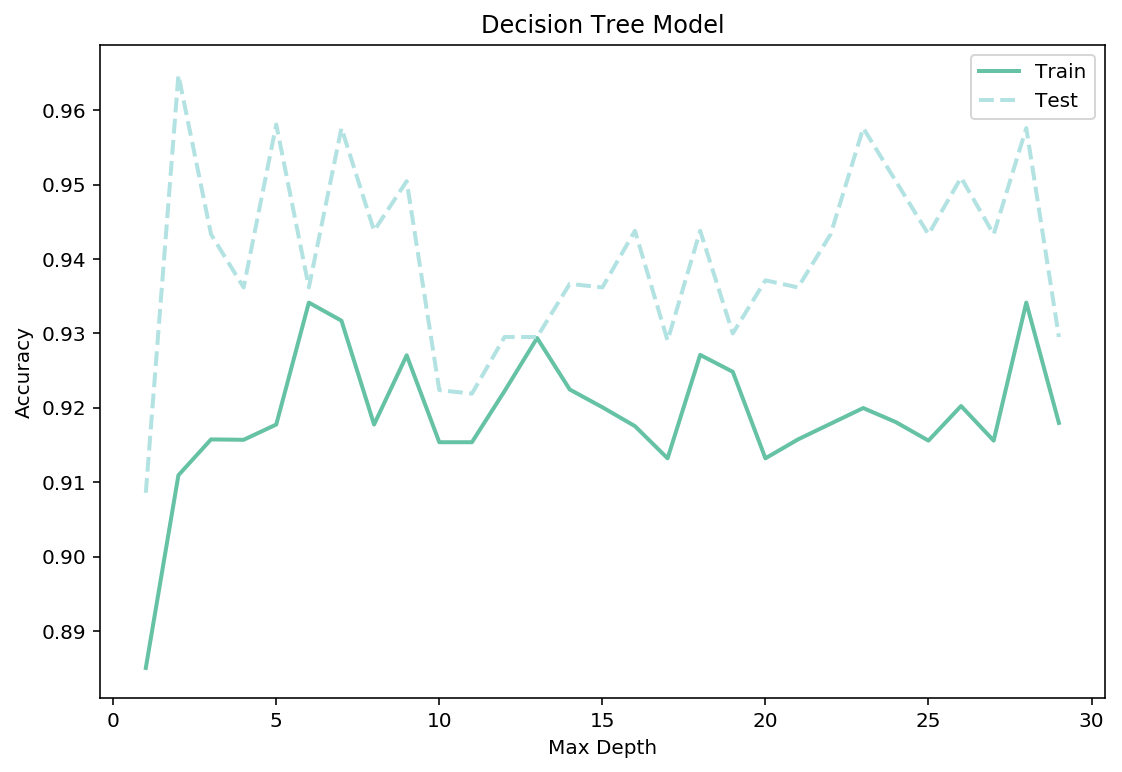

In [8]:
# Define paraameter range and score lists
max_depth_range = np.arange(1,30)
train_score = []
test_score = []

# Train a knn_model for every neighbour value in our list
for i in max_depth_range:
    dt_model=DecisionTreeClassifier(max_depth = i).fit(train_x,train_y)
    train_score.append(cross_val_score(dt_model, train_x, train_y, cv=10, scoring='accuracy').mean())
    test_score.append(cross_val_score(dt_model, test_x, test_y, cv=10, scoring='accuracy').mean())

# Plot our results
mpl.rcParams['figure.figsize'] = (9.0, 6.0)
plt.plot(max_depth_range,train_score,label="Train",linewidth=2, color='#66C2A4') 
plt.plot(max_depth_range,test_score,label="Test", linewidth=2,linestyle='--', color='#B2E2E2')
plt.legend()
plt.title('Decision Tree Model')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy');

##### Feature Importance

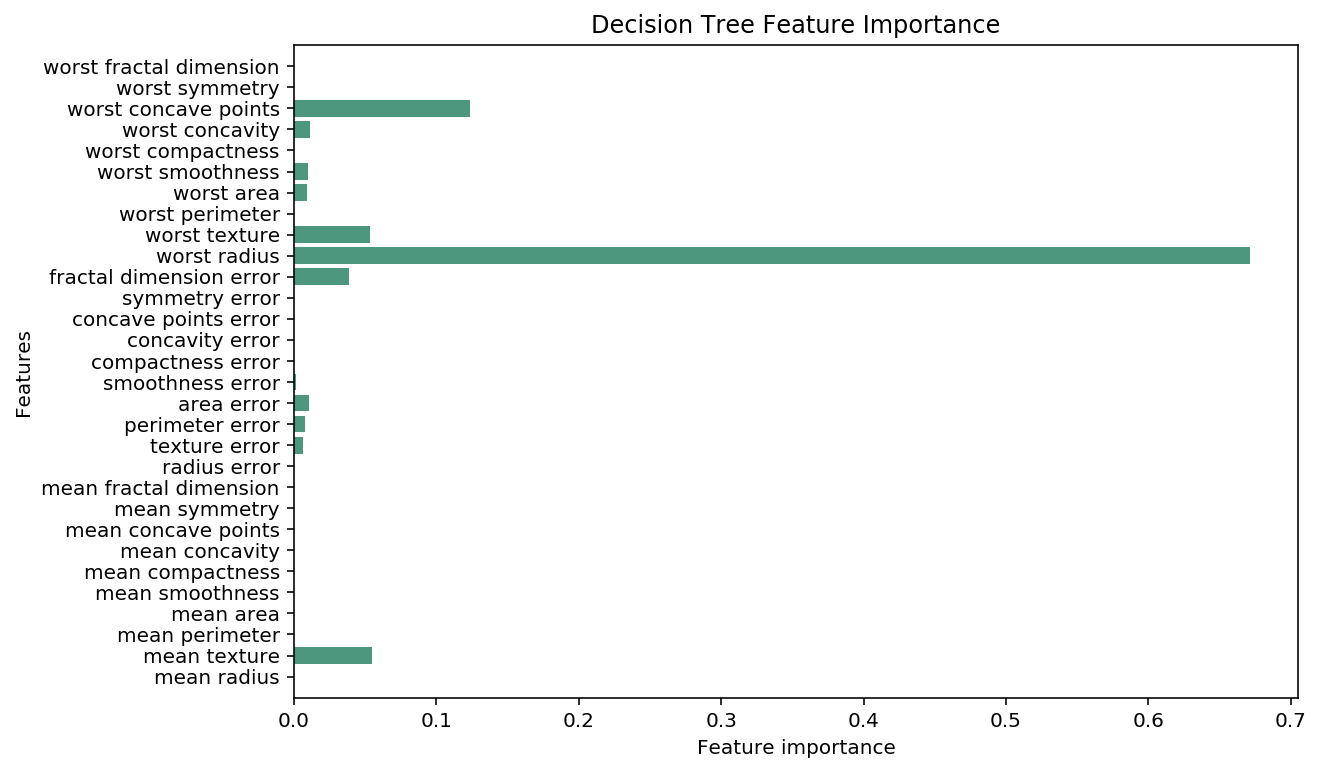

In [9]:
# Plot Tree's Feature Importance
n_features = breast_cancer.data.shape[1]
plt.barh(range(n_features), dt_model.feature_importances_, align='center', color='#4D977E')
plt.yticks(np.arange(n_features), breast_cancer.feature_names)
plt.title('Decision Tree Feature Importance')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features);

##### Grid Search Tunning

In [10]:
# Set up parameter grid
grid = {'max_depth':list(range(2,30)),
        'min_samples_leaf':[10,20,30,40,50,60,70,80,90,100],
       'max_leaf_nodes':[5,10,25,50,75,100]}

# Conduct gird search
grid_search = GridSearchCV(estimator=dt_model, param_grid=grid, 
                     scoring='accuracy', n_jobs=-1, refit=True, cv=10,
                     return_train_score=True)
# Fit model
grid_search.fit(train_x,train_y);

In [11]:
print('Accuracy of best parameters: %.5f'%grid_search.best_score_)
print('Best parameters: %s' %grid_search.best_params_)

Accuracy of best parameters: 0.93427
Best parameters: {'max_depth': 8, 'max_leaf_nodes': 5, 'min_samples_leaf': 10}


### Final Model

In [12]:
# Fit the final model
dt_model = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5, min_samples_leaf=10)
dt_model.fit(train_x, train_y);

# View the cross validation score of the intial model
scores = cross_val_score(dt_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.93188


#### Confustion Matrix

In [13]:
# Training Confusion Matrix for Final Model
from sklearn.metrics import confusion_matrix
cmatrix = pd.DataFrame(confusion_matrix(train_y, dt_model.predict(train_x)))
cmatrix.index.name = 'class'

cmatrix['result'] = 'actual'
cmatrix.set_index('result', append=True, inplace=True)
cmatrix = cmatrix.reorder_levels(['result', 'class'])
cmatrix = cmatrix.stack()
cmatrix = pd.DataFrame(cmatrix)
cmatrix.columns = ['prediction']
cmatrix.unstack()

prediction     
                      0    1
result class                
actual 0            137   15
       1              4  270

##### Feature Importance

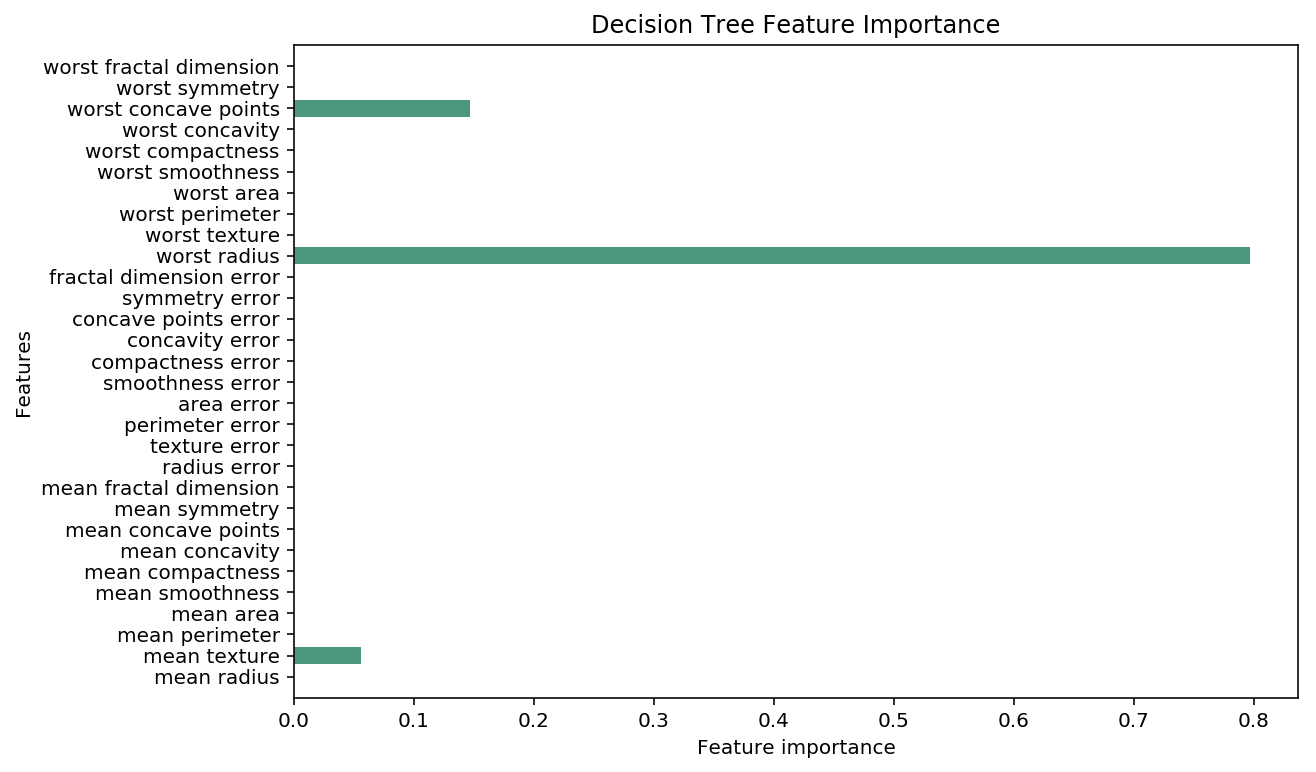

In [14]:
# Plot Tree's Feature Importance
n_features = breast_cancer.data.shape[1]
plt.barh(range(n_features), dt_model.feature_importances_, align='center', color='#4D977E')
plt.yticks(np.arange(n_features), breast_cancer.feature_names)
plt.title('Decision Tree Feature Importance')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features);

##### Tree Diagram

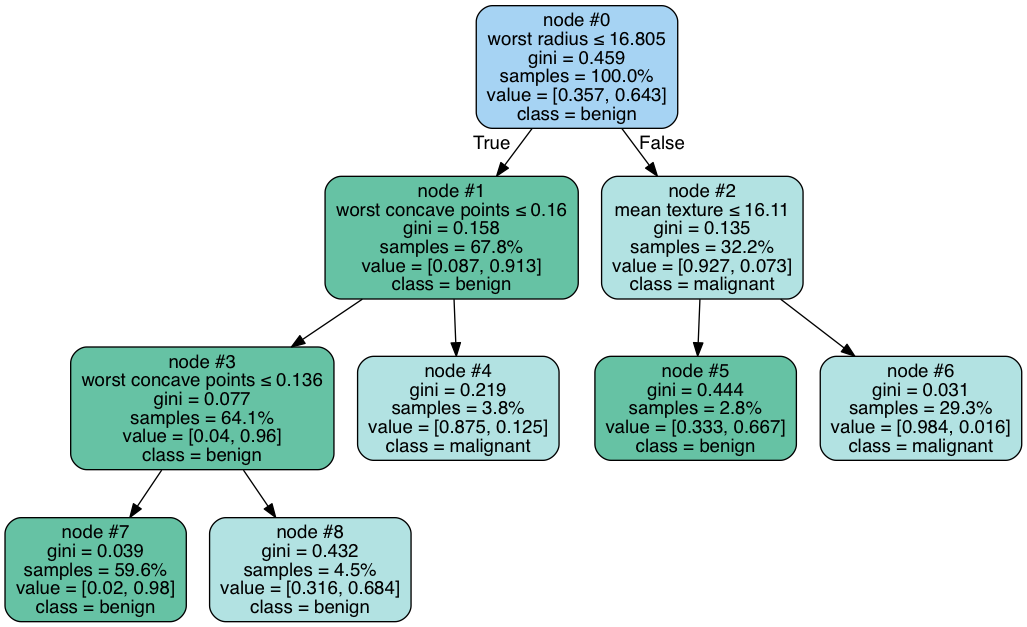

In [15]:
dot_data = StringIO()

# Export graph from sklearn
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = breast_cancer['feature_names'],
               class_names = breast_cancer['target_names'],
               node_ids = True, proportion= True)

# Generate graphusing pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 


# Color Decision Tree
colors = ('#66C2A4', '#B2E2E2')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

# Save Image
graph.write_png('Images/dt_model.png')

# View Decision Tree Plot
Image(graph.create_png())

### Predict Results

In [16]:
pd.Series(dt_model.predict(test_x)).head(n=7)

0    1
1    1
2    0
3    0
4    0
5    0
6    0
dtype: int64

### General Notes

- Regularization can be done via post and pre-pruning
- Sklearn allow your to pre-prune but does not have any post-pruning functions
- If you do not restrict the depth the trees often overfit 
- Results can be easily understood and visuaized
- Decision tree work better when you have feature that ly on diffrent scales, stanadardization is not heavy incouraged
- A mix of binary and continous variable cae be a good thing
- Changing from the gini coeifficient to entropy is not worth the accuracy bump given the computation cost


Author: Kavi Sekhon